In [1]:
import pandas as pd
import pylidc as pl
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

Codigo para lembrar apenas

In [2]:
'''
import sys
!{sys.executable} -m pip install pyradiomics
'''

'\nimport sys\n!{sys.executable} -m pip install pyradiomics\n'

# Leitura dos ficheiros

In [3]:
nodule_counts = pd.read_excel('lidc-idri-nodule-counts-6-23-2015.xlsx', engine='openpyxl')
patient_diagnoses = pd.read_excel('tcia-diagnosis-data-2012-04-20.xls')
dicom_metadata = pd.read_csv('LIDC-IDRI_MetaData.csv')


# Inicializar pylidc para trabalhar com as anotações XML
cases = pl.query(pl.Scan).all()



print(nodule_counts.head())
print(100*"*")
print(patient_diagnoses.head())
print(100*"*")
print(dicom_metadata.head())
print(100*"*")
print(len(cases))

   TCIA Patent ID  Total Number of Nodules*   Number of Nodules >=3mm**  \
0  LIDC-IDRI-0001                          4                          1   
1  LIDC-IDRI-0002                         12                          1   
2  LIDC-IDRI-0003                          4                          4   
3  LIDC-IDRI-0004                          4                          1   
4  LIDC-IDRI-0005                          9                          3   

   Number of Nodules <3mm***  Unnamed: 4  \
0                          3         NaN   
1                         11         NaN   
2                          0         NaN   
3                          3         NaN   
4                          6         NaN   

                                          Unnamed: 5  
0                                                NaN  
1  *total number of lesions that received either ...  
2  **total number of lesions that received a "nod...  
3  ***total number of lesions that received a "no...  
4        

Renomear colunas

In [4]:
# Renomear as colunas para 'PatientID' se necessário
nodule_counts.rename(columns={'TCIA Patent ID': 'PatientID'}, inplace=True)
patient_diagnoses.rename(columns={'TCIA Patient ID': 'PatientID'}, inplace=True)
dicom_metadata.rename(columns={'Subject ID': 'PatientID'}, inplace=True)



# Merge dos datasets Nodule_counts , dicom_metadata , anotações (XML)

In [5]:
patient_info = pd.merge( dicom_metadata,nodule_counts, on='PatientID', how='inner')
print(patient_info)



# Unificar com os metadados DICOM
complete_data = pd.merge(patient_info, patient_diagnoses, on='PatientID', how='inner')

print(complete_data.head())

           PatientID                                          Study UID  \
0     LIDC-IDRI-1001  1.3.6.1.4.1.14519.5.2.1.6279.6001.281499745765...   
1     LIDC-IDRI-0778  1.3.6.1.4.1.14519.5.2.1.6279.6001.174809695196...   
2     LIDC-IDRI-0813  1.3.6.1.4.1.14519.5.2.1.6279.6001.139110171863...   
3     LIDC-IDRI-0710  1.3.6.1.4.1.14519.5.2.1.6279.6001.116146223752...   
4     LIDC-IDRI-0410  1.3.6.1.4.1.14519.5.2.1.6279.6001.818775038273...   
...              ...                                                ...   
1321  LIDC-IDRI-0480  1.3.6.1.4.1.14519.5.2.1.6279.6001.167583044843...   
1322  LIDC-IDRI-0669  1.3.6.1.4.1.14519.5.2.1.6279.6001.886430358468...   
1323  LIDC-IDRI-0974  1.3.6.1.4.1.14519.5.2.1.6279.6001.214565862082...   
1324  LIDC-IDRI-0473  1.3.6.1.4.1.14519.5.2.1.6279.6001.210105060472...   
1325  LIDC-IDRI-0493  1.3.6.1.4.1.14519.5.2.1.6279.6001.333362756208...   

     Study Description             Study Date  \
0                  NaN  2000-01-01 00:00:00.0   
1

In [6]:
'''
# Criar uma lista para armazenar informações detalhadas dos contornos dos nódulos
nodule_data = []

# Obter todos os casos de Scan
cases = pl.query(pl.Scan).all()

# Acessar o décimo paciente (índice 9 porque a contagem começa em 0)
if len(cases) >= 21:
    tenth_case = cases[20]

    # Processar os nódulos do décimo paciente
    for nodule_list in tenth_case.cluster_annotations():
        print(tenth_case.patient_id)
        for nodule in nodule_list:
            print(f"Inspecting Nódulo {nodule.id}: {nodule}")
            
            for contour in nodule.contours:
                print(contour)

            # Visualizar o nódulo em 3D
            nodule.visualize_in_3d(edgecolor='green', cmap='autumn')
else:
    print("Menos de 10 pacientes disponíveis no banco de dados.")
'''

'\n# Criar uma lista para armazenar informações detalhadas dos contornos dos nódulos\nnodule_data = []\n\n# Obter todos os casos de Scan\ncases = pl.query(pl.Scan).all()\n\n# Acessar o décimo paciente (índice 9 porque a contagem começa em 0)\nif len(cases) >= 21:\n    tenth_case = cases[20]\n\n    # Processar os nódulos do décimo paciente\n    for nodule_list in tenth_case.cluster_annotations():\n        print(tenth_case.patient_id)\n        for nodule in nodule_list:\n            print(f"Inspecting Nódulo {nodule.id}: {nodule}")\n            \n            for contour in nodule.contours:\n                print(contour)\n\n            # Visualizar o nódulo em 3D\n            nodule.visualize_in_3d(edgecolor=\'green\', cmap=\'autumn\')\nelse:\n    print("Menos de 10 pacientes disponíveis no banco de dados.")\n'

# Criação do dataset com as anotações de cada nodulo

In [7]:
'''
np.int = np.int32  # Garantir compatibilidade com versões mais novas do NumPy

# Criar uma lista para armazenar informações detalhadas dos contornos dos nódulos
nodule_data = []

# Iterar sobre todos os casos/pacientes
cases = pl.query(pl.Scan).all()

for case in cases:
    patient_id = case.patient_id
    print(f"Processing Patient ID: {patient_id}")
    
    # Iterar sobre os nódulos do paciente
    # Iterar sobre os nódulos do paciente
    for nodule_list in case.cluster_annotations():
        if len(nodule_list) > 0:
            for nodule in nodule_list:
                print(f"Inspecting Nódulo {nodule.id}: {nodule}")
                
                # Iterar sobre os contornos do nódulo
                for contour in nodule.contours:
                    # Armazenar o ID do contorno e a posição da fatia axial (Z_Position)
                    nodule_data.append({
                        'PatientID': patient_id,
                        'NoduleID': nodule.id,
                        'ContourID': contour.id,
                        'DicomFileName': contour.dicom_file_name,
                        'Z_Position': contour.image_z_position,  # Posição da fatia axial
                        'InternalStructure': nodule.internalStructure,
                        'Sphericity': nodule.sphericity,
                        'Calcification': nodule.calcification,
                        'Subtlety': nodule.subtlety,
                        'Lobulation': nodule.lobulation,
                        'Margin': nodule.margin,
                        'Spiculation': nodule.spiculation,
                        'Texture': nodule.texture,
                        'Malignancy': nodule.malignancy
                    })
        else:
            print(f"Nódulo {nodule_list} está vazio.")

# Converter para DataFrame
nodule_df = pd.DataFrame(nodule_data)

# Exibir o DataFrame
print(nodule_df)

'''

'\nnp.int = np.int32  # Garantir compatibilidade com versões mais novas do NumPy\n\n# Criar uma lista para armazenar informações detalhadas dos contornos dos nódulos\nnodule_data = []\n\n# Iterar sobre todos os casos/pacientes\ncases = pl.query(pl.Scan).all()\n\nfor case in cases:\n    patient_id = case.patient_id\n    print(f"Processing Patient ID: {patient_id}")\n    \n    # Iterar sobre os nódulos do paciente\n    # Iterar sobre os nódulos do paciente\n    for nodule_list in case.cluster_annotations():\n        if len(nodule_list) > 0:\n            for nodule in nodule_list:\n                print(f"Inspecting Nódulo {nodule.id}: {nodule}")\n                \n                # Iterar sobre os contornos do nódulo\n                for contour in nodule.contours:\n                    # Armazenar o ID do contorno e a posição da fatia axial (Z_Position)\n                    nodule_data.append({\n                        \'PatientID\': patient_id,\n                        \'NoduleID\': nod

# Transformas os dois datasets em csv

In [8]:
#nodule_df.to_csv('C:\\Users\\admin\\Desktop\\Laboratorios\\nodule_df.csv', index=False)
#complete_data.to_csv('C:\\Users\\gjoli\\Desktop\\UNI3\\lab\\complete_data.csv', index=False)

NameError: name 'nodule_df' is not defined

In [9]:
import os

dicom_dir = r"C:\Users\admin\Desktop\Laboratorios\manifest-1600709154662\LIDC-IDRI"


def process_dicom_images(dicom_dir):
    for root, dirs, files in os.walk(dicom_dir):

        print("Root: ",root)
        print("Dirs: ",dirs)
        print("Files: ",files)

        patient_id = os.path.basename(root)
        print(f"Processing Patient ID: {patient_id}")
        
        for file in files:
            if not file.lower().endswith(".dcm"):
                print("Ainda não é imagem")
                continue
            
            dicom_path = os.path.join(root, file)
            print(f"Processing DICOM file: {dicom_path}")
            

# Executar a função de processamento
process_dicom_images(dicom_dir)

Root:  C:\Users\admin\Desktop\Laboratorios\manifest-1600709154662\LIDC-IDRI
Dirs:  ['LIDC-IDRI-0001', 'LIDC-IDRI-0002', 'LIDC-IDRI-0003', 'LIDC-IDRI-0004', 'LIDC-IDRI-0005', 'LIDC-IDRI-0006', 'LIDC-IDRI-0007', 'LIDC-IDRI-0008', 'LIDC-IDRI-0009', 'LIDC-IDRI-0010', 'LIDC-IDRI-0011', 'LIDC-IDRI-0012', 'LIDC-IDRI-0013', 'LIDC-IDRI-0014', 'LIDC-IDRI-0015', 'LIDC-IDRI-0016', 'LIDC-IDRI-0017', 'LIDC-IDRI-0018', 'LIDC-IDRI-0019', 'LIDC-IDRI-0020', 'LIDC-IDRI-0021', 'LIDC-IDRI-0022', 'LIDC-IDRI-0023', 'LIDC-IDRI-0024', 'LIDC-IDRI-0025', 'LIDC-IDRI-0026', 'LIDC-IDRI-0027', 'LIDC-IDRI-0028', 'LIDC-IDRI-0029', 'LIDC-IDRI-0030', 'LIDC-IDRI-0031', 'LIDC-IDRI-0032', 'LIDC-IDRI-0033', 'LIDC-IDRI-0034', 'LIDC-IDRI-0035', 'LIDC-IDRI-0036', 'LIDC-IDRI-0037', 'LIDC-IDRI-0038', 'LIDC-IDRI-0039', 'LIDC-IDRI-0040', 'LIDC-IDRI-0041', 'LIDC-IDRI-0042', 'LIDC-IDRI-0043', 'LIDC-IDRI-0044', 'LIDC-IDRI-0045', 'LIDC-IDRI-0046', 'LIDC-IDRI-0047', 'LIDC-IDRI-0048', 'LIDC-IDRI-0049', 'LIDC-IDRI-0050', 'LIDC-IDRI-0051'

In [ ]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Diretório das imagens DICOM
dicom_dir = r"C:\Users\admin\Desktop\Laboratorios\manifest-1600709154662\LIDC-IDRI"

def convert_to_hu(dicom_img):
    # Verificar os valores do Slope e Intercept
    intercept = dicom_img.RescaleIntercept if hasattr(dicom_img, 'RescaleIntercept') else 0
    slope = dicom_img.RescaleSlope if hasattr(dicom_img, 'RescaleSlope') else 1
    
    # Aplicar a conversão para HU
    img_hu = dicom_img.pixel_array * slope + intercept
    
    # Aplicar um filtro para remover valores "fora do corpo" (HU abaixo de -1024)
    img_hu[img_hu < -1024] = -1024  # Limitar os valores a no mínimo -1024
    img_hu[img_hu > 3000] = 3000  # Limitar os valores a no mínimo -1024
    
    return img_hu


def check_hu_values(image_hu, min_hu=-1000, max_hu=3000):
    # Verificar valores mínimos e máximos
    hu_min = image_hu.min()
    hu_max = image_hu.max()
    
    # Verificar se estão fora do intervalo esperado
    #if hu_min < -1000 or hu_max > 3000:
    #    print(f"Valor HU fora do normal: HU Min = {hu_min}, HU Max = {hu_max}")
    
    # Verificar valor de um pixel específico (pixel central, por exemplo)
    central_pixel_value = image_hu[image_hu.shape[0] // 2, image_hu.shape[1] // 2]
    if central_pixel_value < -1000 or central_pixel_value > 3000:
        print(f"Valor HU no pixel central fora do normal: {central_pixel_value}")


def segment_lung_mask(image, threshold=-400):
    # Cria uma máscara binária onde o ar (HU < -400) é separado do tecido (HU > -400)
    binary_image = np.array(image > threshold, dtype=np.int8)
    return binary_image

def find_contours(image, level):
    # Detecta contornos na imagem segmentada
    contours = measure.find_contours(image, level=level)
    return contours

def load_dicom_images(dicom_dir):
    images = []
    for root, dirs, files in os.walk(dicom_dir):
        for file in files:
            if file.lower().endswith(".dcm"):
                dicom_path = os.path.join(root, file)
                dcm_image = pydicom.dcmread(dicom_path)
                images.append(dcm_image.pixel_array)
                
                print("IMAGEM ORIGINAL")
                plt.imshow(dcm_image.pixel_array, cmap='gray')
                plt.show()

                img_hu=convert_to_hu(dcm_image)
                
                #check_hu_values(img_hu)

                #print("IMAGEM NORMALIZADA")
                #plt.imshow(img_hu, cmap='gray')
                #plt.show()
                
                lung_mask = segment_lung_mask(img_hu)
                #print("PULMOES SEGMENTADOS")
                #plt.imshow(lung_mask, cmap='gray')
                #plt.show()

                #plt.figure(figsize=(12, 6))
                #plt.subplot(1, 2, 1)
                #plt.imshow(lung_mask, cmap='gray')
                #plt.title("Máscara de Segmentação dos Pulmões")
                
                lung_segmented=img_hu*lung_mask
                #plt.subplot(1, 2, 2)
                #plt.imshow(lung_segmented, cmap='gray')
                #plt.title("Pulmões Segmentados")
                #plt.show()


                #contours = find_contours(lung_mask, level=0.5)
                #print("SEGMENTO")
                #plt.imshow(img_hu, cmap='gray')
                #for contour in contours:
                #    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
                #plt.show()

    return images



images = load_dicom_images(dicom_dir)

In [ ]:
'''
def combine_images(images):
    # Supondo que todas as imagens tenham as mesmas dimensões
    combined_image = np.stack(images, axis=-1)  # Empilha as imagens ao longo de um novo eixo
    return combined_image

# Carregar as imagens DICOM
images = load_dicom_images(dicom_dir)
print("Imagens: ",images)
# Combinar as imagens
combined_image = combine_images(images)

# Visualizar a primeira imagem da combinação
plt.imshow(combined_image[:, :, 0], cmap='gray')
plt.title("Imagem combinada - primeira fatia")
plt.axis('off')
plt.show()

# Se você quiser salvar a imagem combinada como um arquivo de imagem (ex: PNG)
plt.imsave("combined_image.png", combined_image[:, :, 0], cmap='gray')
'''

In [9]:
import os
import pydicom
import pylidc as pl
import pandas as pd

nodule_df = pd.read_csv('nodule_df.csv')

def load_dicom_images_and_nodules(base_dir):
    patient_data = {}  # Dicionário para armazenar imagens e nódulos

    for patient_folder in os.listdir(base_dir):
        patient_path = os.path.join(base_dir, patient_folder)
        
        # Verificar se é uma pasta
        if os.path.isdir(patient_path):
            # Armazenar o ID do paciente
            patient_id = patient_folder
            print("ID do paciente: ", patient_id)
            
            # Adicionar condição para parar até o paciente com ID 10
            if patient_id <= "LIDC-IDRI-0010":
                # Carregar as imagens DICOM
                images = []
                for root, dirs, files in os.walk(patient_path):
                    for file in files:
                        if file.lower().endswith(".dcm"):
                            dicom_path = os.path.join(root, file)
                            dcm_image = pydicom.dcmread(dicom_path)
                            images.append(dcm_image.pixel_array)
                
                # Armazenar as imagens e nódulos no dicionário
                patient_data[patient_id] = {
                    "images": images,
                    "nodules": nodule_df[nodule_df['PatientID'] == patient_id]  # Acessar os nódulos do paciente
                }
            else:
                print(f"Parando a execução após o paciente: {patient_id}")
                break
    
    return patient_data

# Usar a função
base_dir = "C:\\Users\\admin\\Desktop\\Laboratorios\\manifest-1600709154662\\LIDC-IDRI"
patient_data = load_dicom_images_and_nodules(base_dir)

# Exibir informações sobre os pacientes carregados
for patient_id, data in patient_data.items():
    print(f"Patient ID: {patient_id}")
    print(f"Número de imagens: {len(data['images'])}")
    print(f"Nódulos encontrados: {[nodule['NoduleID'] for _, nodule in data['nodules'].iterrows()]}")



ID do paciente:  LIDC-IDRI-0001
ID do paciente:  LIDC-IDRI-0002
ID do paciente:  LIDC-IDRI-0003
ID do paciente:  LIDC-IDRI-0004
ID do paciente:  LIDC-IDRI-0005
ID do paciente:  LIDC-IDRI-0006
ID do paciente:  LIDC-IDRI-0007
ID do paciente:  LIDC-IDRI-0008
ID do paciente:  LIDC-IDRI-0009
ID do paciente:  LIDC-IDRI-0010
ID do paciente:  LIDC-IDRI-0011
Parando a execução após o paciente: LIDC-IDRI-0011
Patient ID: LIDC-IDRI-0001
Número de imagens: 135
Nódulos encontrados: [84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87]
Patient ID: LIDC-IDRI-0002
Número de imagens: 262
Nódulos encontrados: [88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89]
Patient ID: LIDC-IDRI-0003
Número de imagens: 145
Nódulos encontrados: [102, 102, 102, 102, 102, 102, 102, 102, 9

In [29]:
import pylidc as pl

def get_nodule_coordinates(patient_id):
    # Carregar o scan do paciente
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id).first()
    
    if scan is None:
        print(f"Nenhum scan encontrado para o paciente {patient_id}")
        return None
    
    # Obter as anotações dos nódulos
    annotations = scan.annotations
    
    # Percorrer cada nódulo anotado
    for i, annotation in enumerate(annotations):
        #print(f"Paciente {i + 1}:")
        #print(f"  Nodule ID: {annotation.id}")
        #print(f"  Coordenadas das fatias (slices): {annotation.contour_points}")

        contours = annotation.contours
        for contour in contours:
            #print(contour)
            coordinates = contour.to_matrix()
            #print(f"Coordinates (x, y, z) for Contour {contour.id}:")
            #print(coordinates)
    
    return annotations

# Exemplo de uso
patient_id = "LIDC-IDRI-0001"  # Substitua pelo ID do paciente que você quer analisar
annotations = get_nodule_coordinates(patient_id)


Nódulo 1:
  Contour ID: 84
Coordinates (x, y, z) for Contour 358:
[[355 312  86]
 [356 311  86]
 [357 310  86]
 [357 309  86]
 [358 308  86]
 [359 308  86]
 [360 308  86]
 [360 307  86]
 [361 306  86]
 [362 306  86]
 [363 305  86]
 [364 304  86]
 [365 303  86]
 [366 303  86]
 [367 302  86]
 [368 302  86]
 [369 302  86]
 [370 301  86]
 [371 301  86]
 [371 300  86]
 [372 299  86]
 [373 299  86]
 [374 299  86]
 [375 299  86]
 [376 299  86]
 [377 300  86]
 [378 301  86]
 [379 302  86]
 [379 303  86]
 [379 304  86]
 [379 305  86]
 [379 306  86]
 [378 307  86]
 [377 308  86]
 [376 308  86]
 [375 309  86]
 [375 310  86]
 [375 311  86]
 [375 312  86]
 [375 313  86]
 [375 314  86]
 [375 315  86]
 [375 316  86]
 [375 317  86]
 [375 318  86]
 [375 319  86]
 [374 320  86]
 [373 321  86]
 [372 322  86]
 [371 322  86]
 [370 322  86]
 [369 323  86]
 [368 324  86]
 [367 325  86]
 [366 326  86]
 [365 327  86]
 [364 328  86]
 [363 328  86]
 [362 327  86]
 [361 327  86]
 [360 326  86]
 [359 325  86]
 [35

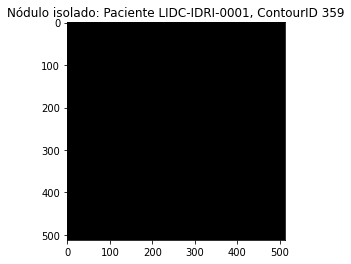

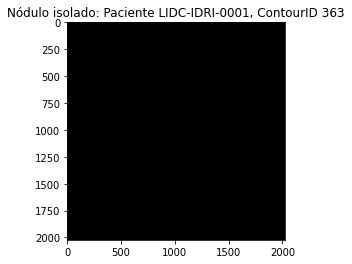

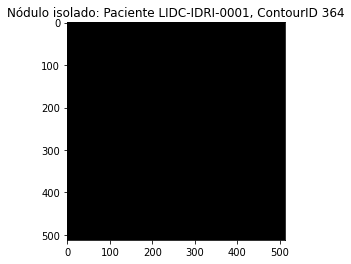

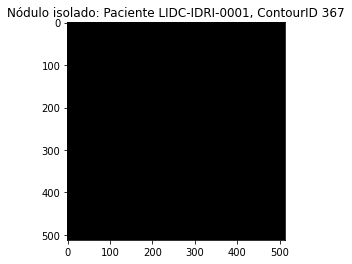

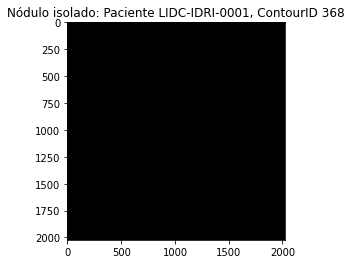

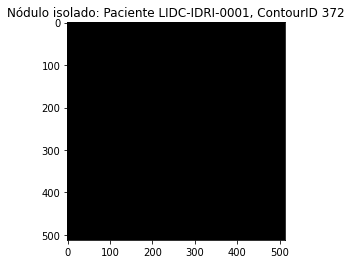

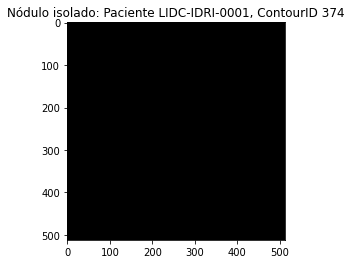

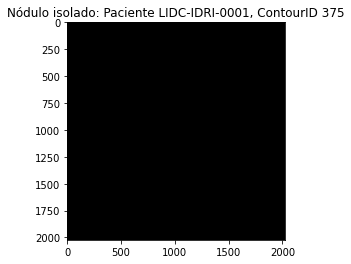

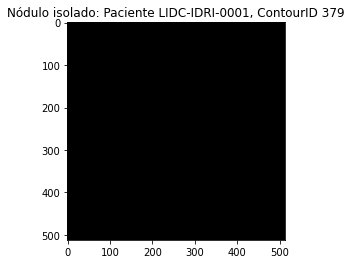

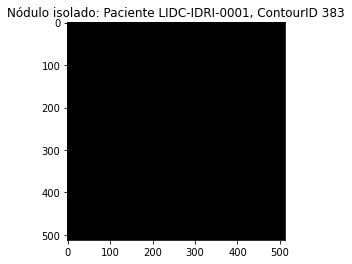

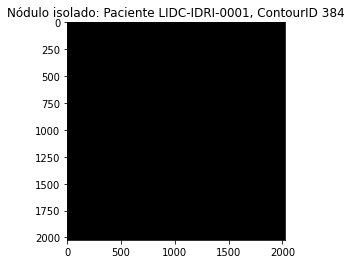

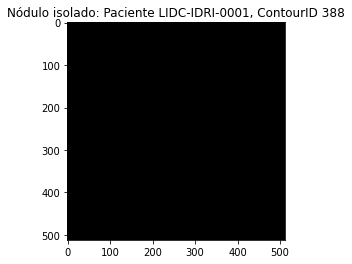

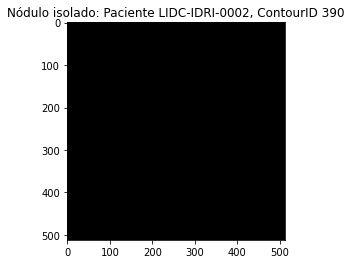

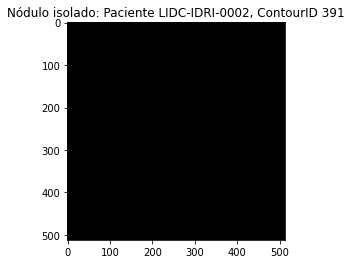

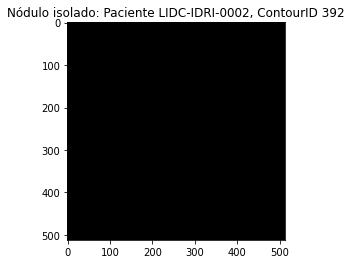

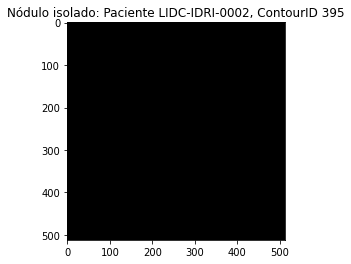

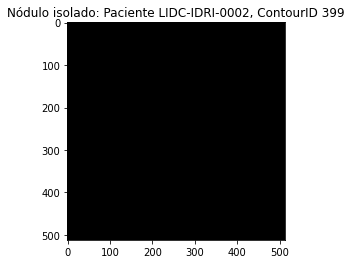

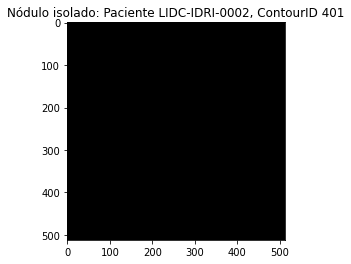

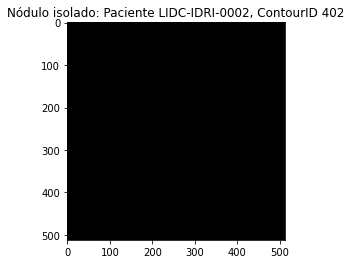

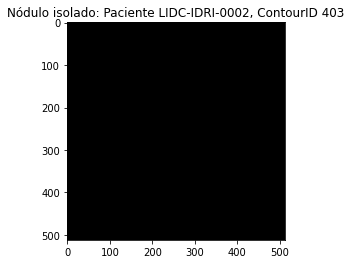

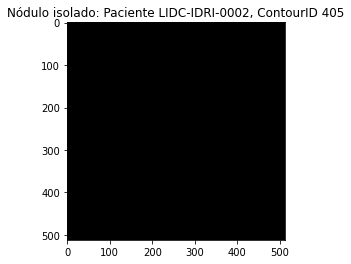

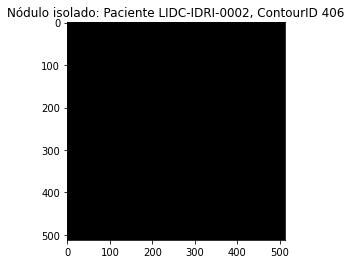

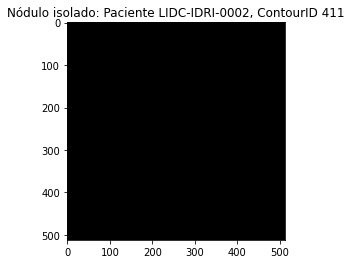

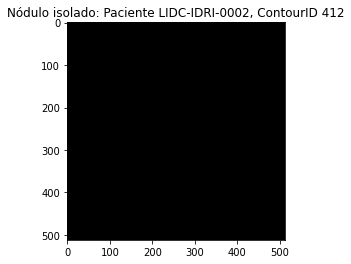

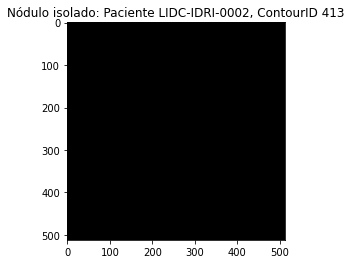

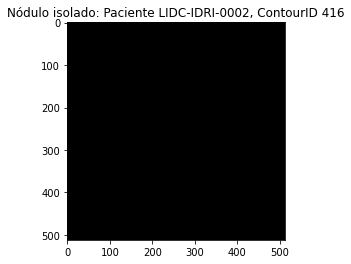

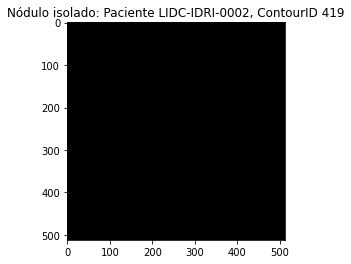

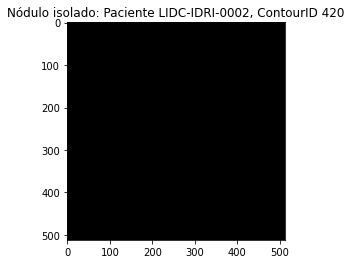

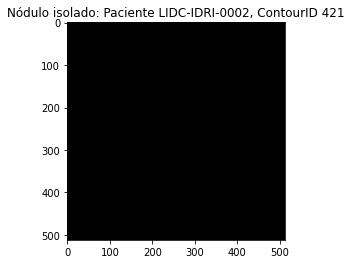

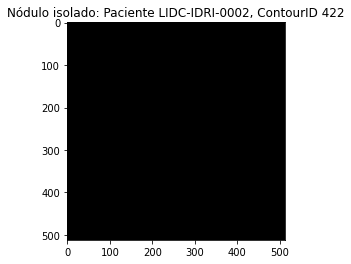

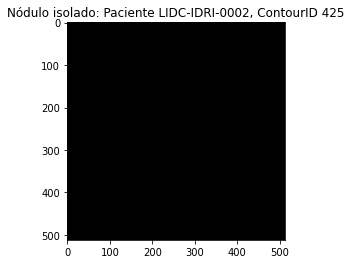

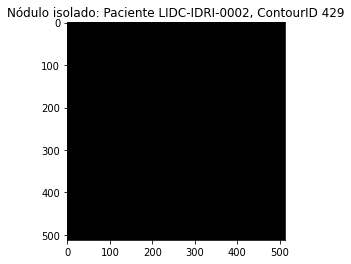

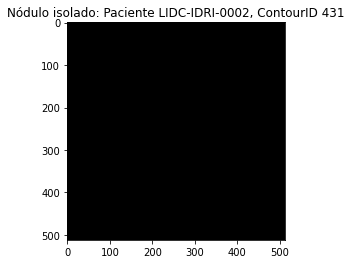

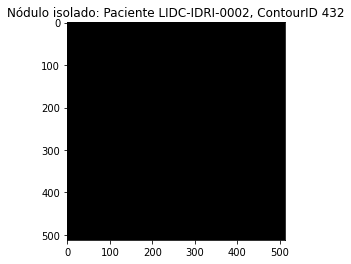

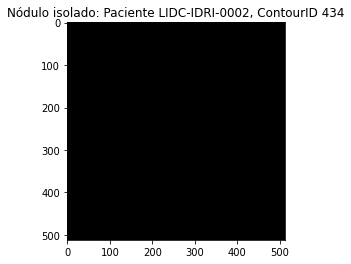

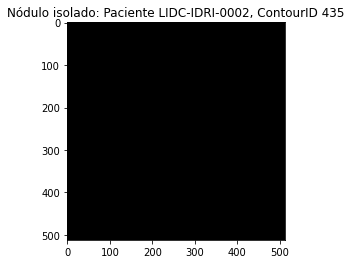

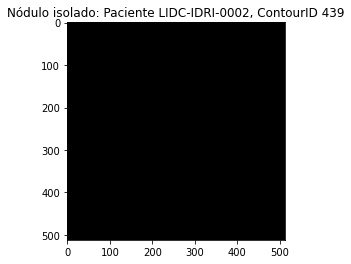

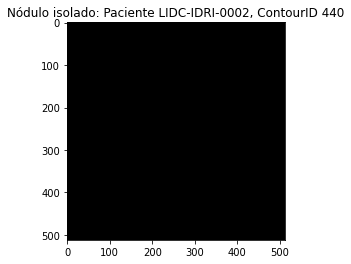

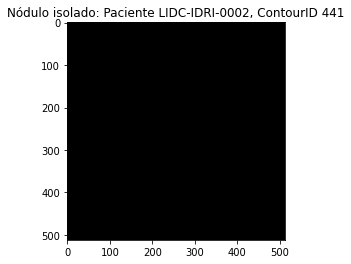

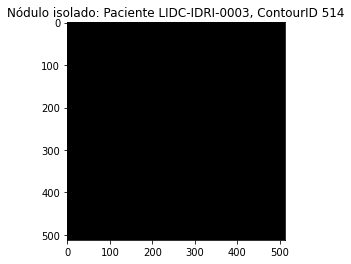

KeyboardInterrupt: 

In [31]:
import pandas as pd
import pydicom
import os
import matplotlib.pyplot as plt

# Carregar o dataset
nodule_df = pd.read_csv('nodule_df.csv')

# Função para carregar e isolar nódulos
def isolate_nodules(base_dir, nodule_df):
    for _, row in nodule_df.iterrows():
        patient_id = row['PatientID']
        
        # Verificar se o ID do paciente é menor ou igual a 57 (É so porque nao tenho as imagens todas)
        if int(patient_id.split('-')[-1]) > 57:  # Extrai o número do ID
            continue  # Ignora pacientes com ID maior que 57
        
        dicom_file = row['DicomFileName']
        #print(dicom_file)
        contour_id = row['ContourID']
        
        # Localizar a pasta do paciente
        patient_folder = os.path.join(base_dir, patient_id)
        
        modified_dicom_file = f'1-{dicom_file}'

        # Percorrer as subpastas para encontrar o arquivo DICOM
        for root, dirs, files in os.walk(patient_folder):
            
            #print("Root: ",root)
            #print("Dirs: ",dirs)
            #print("Files: ",files)


            if modified_dicom_file in files:  # Verifica se o arquivo está nesta pasta
                dicom_path = os.path.join(root, modified_dicom_file)
                
                # Ler a imagem DICOM
                dcm_image = pydicom.dcmread(dicom_path)
                pixel_array = dcm_image.pixel_array
                
                # Aqui você deve obter as coordenadas do nódulo usando o ContourID
                annotations=get_nodule_coordinates(patient_id)
                
                # Isolar o nódulo usando as coordenadas
                
                #Falta isto aqui
                
                # Visualizar ou armazenar a imagem com o nódulo isolado
                #print(f'Processed DICOM: {dicom_path}')
                #plt.imshow(dcm_image.pixel_array, cmap='gray')
                #plt.show()
                break  # Interrompe o loop após encontrar o arquivo

# Usar a função
base_dir = "C:\\Users\\admin\\Desktop\\Laboratorios\\manifest-1600709154662\\LIDC-IDRI"
isolate_nodules(base_dir, nodule_df)
